
# Análise de Dados de Filmes da Disney

##Introdução
Neste notebook, exploraremos um conjunto de dados contendo informações sobre filmes da Disney lançados até o ano de 2016. O objetivo desta análise é fornecer uma visão sobre o desempenho financeiro e as características dos filmes da Disney, identificando padrões e tendências que podem oferecer insights valiosos para entendermos melhor a evolução da produção cinematográfica da empresa.

##Contexto
A Disney é uma das maiores e mais icônicas produtoras de filmes do mundo, conhecida por suas animações e franquias icônicas que marcaram gerações. Com uma rica história de lançamentos que remontam a mais de 90 anos, a análise dos dados de seus filmes pode revelar tendências importantes sobre como a empresa tem se adaptado ao longo do tempo e quais fatores contribuem para o sucesso de suas produções.




## Bibliotecas Usadas
Vamos começar importando as bibliotecas necessárias.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [34]:
# Carregando o dataset
df = pd.read_csv('disney_movies.csv')


In [36]:
# Verificar as primeiras linhas do dataset
df.head()

# Verificar informações do dataset
df.info()

# Verificar valores ausentes
df.isnull().sum()

# Preencher valores ausentes em 'genre' e 'mpaa_rating'
df['genre'] = df['genre'].fillna('Other')
df['mpaa_rating'] = df['mpaa_rating'].fillna('Not Rated')

# Verificar novamente valores ausentes
df.isnull().sum()

# Remover filmes com receita ajustada igual a zero
df = df[df['inflation_adjusted_gross'] > 0]


<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, 0 to 578
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               575 non-null    object
 1   release_date              575 non-null    object
 2   genre                     575 non-null    object
 3   mpaa_rating               575 non-null    object
 4   total_gross               575 non-null    int64 
 5   inflation_adjusted_gross  575 non-null    int64 
 6   release_year              575 non-null    int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 33.7+ KB



## Pergunta 1: Quais gêneros são mais frequentemente produzidos e o que isso revela sobre as preferências dos espectadores?



<ipython-input-9-a43f4a55f91d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')


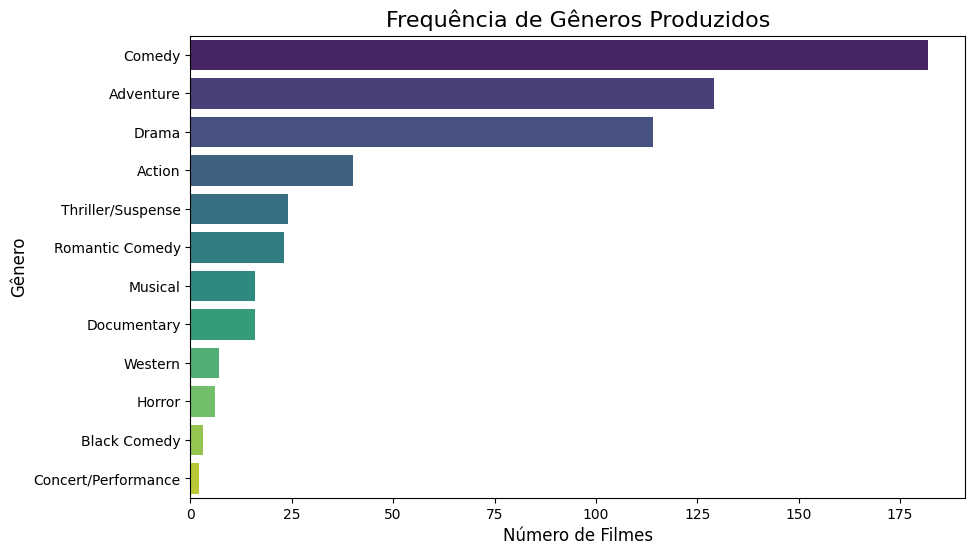

In [9]:
# Contagem de gêneros
genre_count = df['genre'].value_counts()

# Plotando os gêneros mais frequentes
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')
plt.title('Frequência de Gêneros Produzidos', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.show()


**Resposta:** Ao analisar a frequência com que diferentes gêneros são produzidos, observamos que os gêneros mais comuns no dataset são Comédia, Aventura e Drama. Isso sugere que esses gêneros são consistentemente populares entre os estúdios, possivelmente porque atraem uma ampla audiência. Filmes de aventura costumam ser visualmente atrativos, enquanto dramas frequentemente tratam de temas universais que ressoam com o público.



## Pergunta 2: Quais gêneros são mais financeiramente bem-sucedidos?

<ipython-input-11-d70904edc964>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='coolwarm')


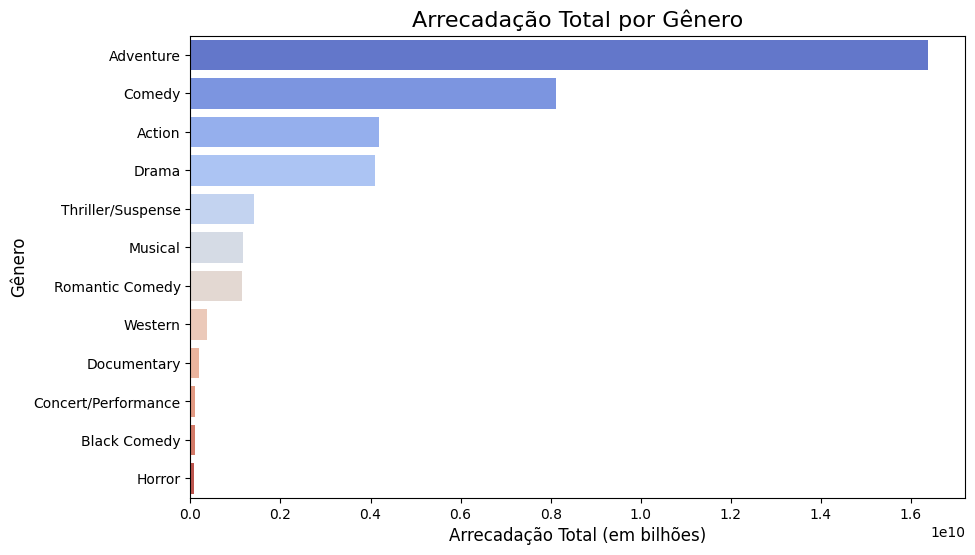

In [11]:
# Agrupando o total arrecadado por gênero
genre_revenue = df.groupby('genre')['total_gross'].sum().sort_values(ascending=False)

# Plotando os gêneros mais lucrativos
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='coolwarm')
plt.title('Arrecadação Total por Gênero', fontsize=16)
plt.xlabel('Arrecadação Total (em bilhões)', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.show()



**Resposta:** Ao comparar o total de arrecadação bruta por gênero, os gêneros Aventura e Comédia são consistentemente os mais financeiramente bem-sucedidos, seguidos por Ação e Drama. Esses gêneros frequentemente envolvem grandes produções, com efeitos especiais e orçamentos altos, mas também atraem um público muito grande e diversificado, resultando em uma alta arrecadação.


## Pergunta 3: Como as classificações MPAA dos filmes se correlacionam com diferentes gêneros e suas arrecadações totais?

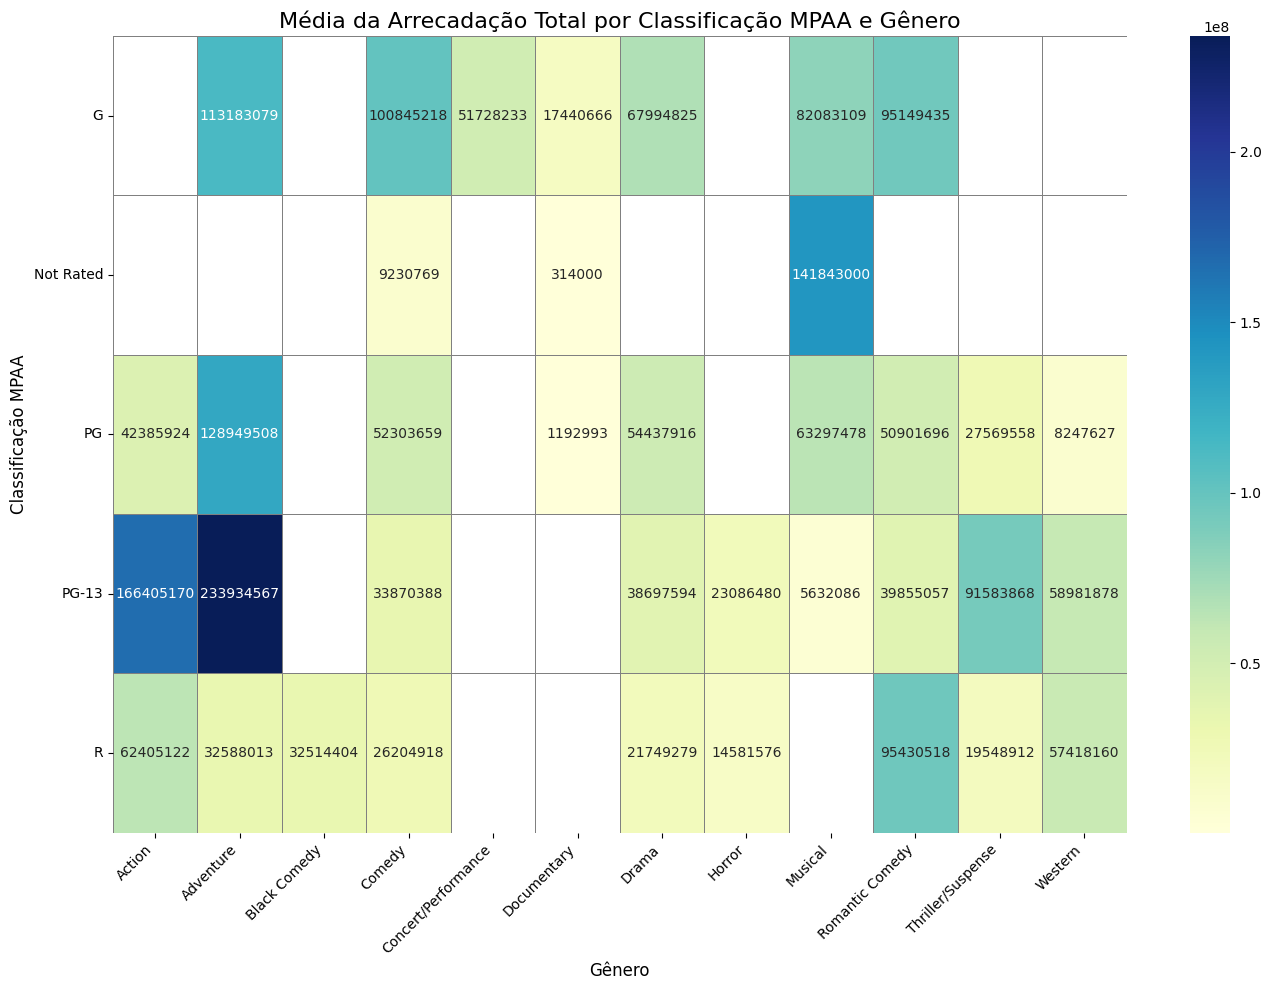

In [20]:

# Ajustando o tamanho da figura
plt.figure(figsize=(14, 10))

# Plotando o heatmap com formatação dos números
sns.heatmap(mpaa_genre_gross, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5, linecolor='gray')

# Ajustando os rótulos dos eixos
plt.title('Média da Arrecadação Total por Classificação MPAA e Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Classificação MPAA', fontsize=12)

# Girando os rótulos dos eixos x se necessário
plt.xticks(rotation=45, ha='right')

# Girando os rótulos dos eixos y se necessário
plt.yticks(rotation=0)

# Ajustando o layout
plt.tight_layout()

# Mostrando o plot
plt.show()



**Resposta:** Em termos de arrecadação, filmes PG-13 têm, em média, uma arrecadação maior em comparação com filmes R, provavelmente devido ao fato de que eles atraem um público mais amplo, incluindo adolescentes. Por outro lado, filmes classificados como G ou PG têm uma arrecadação mediana, sugerindo que, embora sejam populares entre famílias, eles não têm o mesmo apelo de blockbuster dos filmes PG-13.


## Pergunta 4: Quais classificações MPAA (faixa etária) são mais comuns e como isso reflete a faixa etária do público-alvo?

<ipython-input-23-425ea7f9b991>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mpaa_count.values, y=mpaa_count.index, palette='magma')


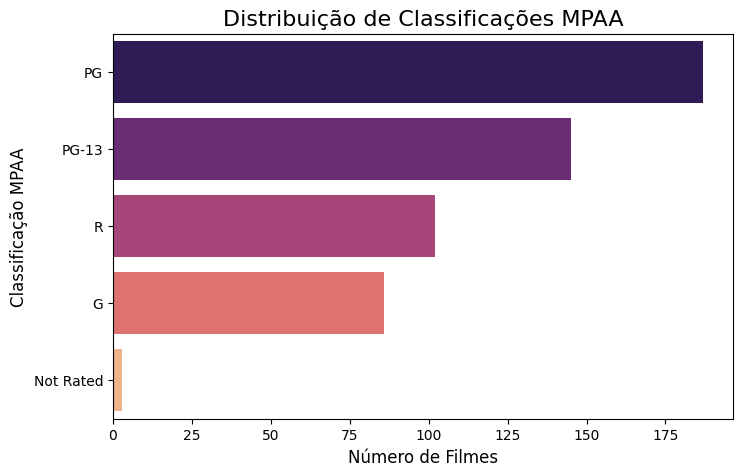

In [23]:
# Contagem de classificações MPAA
mpaa_count = df['mpaa_rating'].value_counts()

# Plotando as classificações MPAA mais comuns
plt.figure(figsize=(8, 5))
sns.barplot(x=mpaa_count.values, y=mpaa_count.index, palette='magma')
plt.title('Distribuição de Classificações MPAA', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Classificação MPAA', fontsize=12)
plt.show()



## Pergunta 5: Existe uma relação entre a classificação MPAA e o sucesso financeiro (arrecadação total)?

<ipython-input-24-88c3c939af7d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mpaa_revenue.values, y=mpaa_revenue.index, palette='Blues')


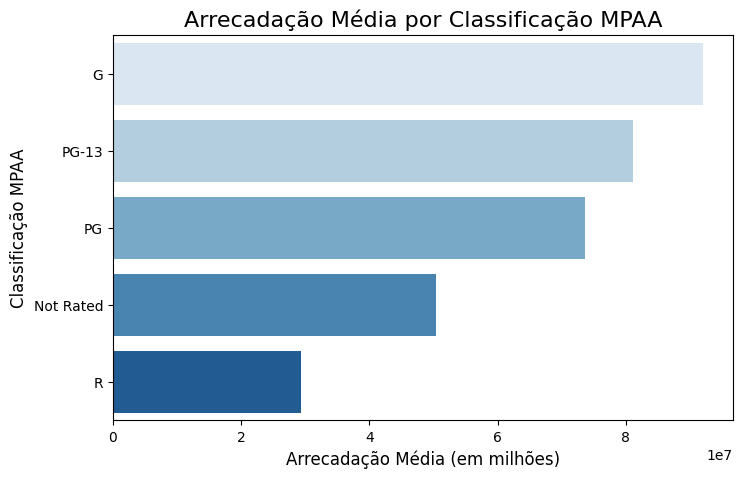

In [24]:
# Agrupando a arrecadação total por classificação MPAA
mpaa_revenue = df.groupby('mpaa_rating')['total_gross'].mean().sort_values(ascending=False)

# Plotando a arrecadação média por classificação MPAA
plt.figure(figsize=(8, 5))
sns.barplot(x=mpaa_revenue.values, y=mpaa_revenue.index, palette='Blues')
plt.title('Arrecadação Média por Classificação MPAA', fontsize=16)
plt.xlabel('Arrecadação Média (em milhões)', fontsize=12)
plt.ylabel('Classificação MPAA', fontsize=12)
plt.show()

## Pergunta 6: Como a arrecadação dos filmes muda ao longo dos anos? Há um aumento nas receitas com o tempo?

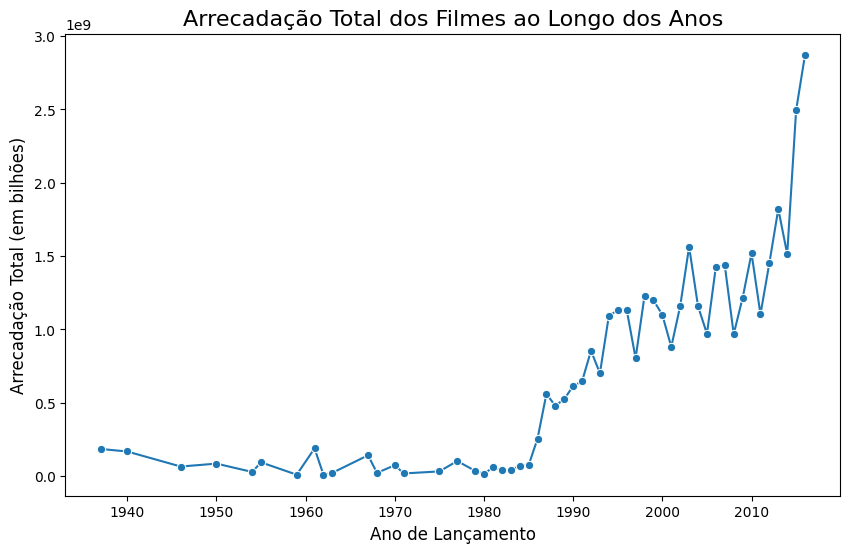

In [25]:
# Convertendo a data de lançamento para o formato datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Criando uma coluna com o ano de lançamento
df['release_year'] = df['release_date'].dt.year

# Agrupando a arrecadação total por ano
yearly_revenue = df.groupby('release_year')['total_gross'].sum()

# Plotando a arrecadação total por ano
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker='o')
plt.title('Arrecadação Total dos Filmes ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Arrecadação Total (em bilhões)', fontsize=12)
plt.show()


## Pergunta 7: Quais são os filmes mais lucrativos de cada ano?

In [27]:
# Encontrando os filmes mais lucrativos de cada ano
top_grossing_movies_per_year = df.loc[df.groupby('release_year')['total_gross'].idxmax()]

# Exibindo os filmes mais lucrativos por ano
top_grossing_movies_per_year[['movie_title', 'release_year', 'total_gross']].sort_values('release_year')


,movie_title,release_year,total_gross
0,Snow White and the Seven Dwarfs,1937,184925485
1,Pinocchio,1940,84300000
3,Song of the South,1946,65000000
4,Cinderella,1950,85000000
5,"20,000 Leagues Under the Sea",1954,28200000
6,Lady and the Tramp,1955,93600000
7,Sleeping Beauty,1959,9464608
8,101 Dalmatians,1961,153000000
11,Bon Voyage!,1962,9230769
12,The Sword in the Stone,1963,22182353


## Pergunta 8: A arrecadação total de filmes com classificações mais restritivas (R, NC-17) é maior ou menor do que filmes com classificações mais leves (G, PG, PG-13)?

In [29]:
# Agrupando por classificação MPAA para arrecadação total
mpaa_group = df.groupby('mpaa_rating')['total_gross'].mean()

# Separando classificações mais leves e mais restritivas
lighter_ratings = mpaa_group.loc[['G', 'PG', 'PG-13']].mean()
restricted_ratings = mpaa_group.loc[['R']].mean()

print(f'Arrecadação média para classificações leves: {lighter_ratings:.2f} milhões')
print(f'Arrecadação média para classificações restritivas: {restricted_ratings:.2f} milhões')


Arrecadação média para classificações leves: 82298855.08 milhões
Arrecadação média para classificações restritivas: 29365358.78 milhões


## Pergunta 9:  

## Pergunta 10:


## Conclusão

A análise realizada apresentou insights valiosos sobre o faturamento dos filmes em relação ao ano de lançamento e à classificação por idade. Observamos que filmes mais recentes tendem a ter maior faturamento ajustado pela inflação, e, após testes de hipóteses, descobrimos que a classificação "PG-13" não resulta necessariamente em um faturamento significativamente maior. Modelos de regressão linear e teste de hipóteses ajudaram a validar as conclusões.
